# Data set for birth weight investigations from she

In [1]:
#importing the required packes for  use in the study.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_rel
import pingouin as pg

# setting the graph size
plt.rcParams["figure.figsize"] =(10,6)

In [2]:
# eyball the data
df = pd.read_csv('data/birthdata.csv')
df.tail()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
37,619,52,3.41,33,39,1,23,25,181,69,23,16,2,181,0,0
38,1369,49,3.18,34,38,1,31,25,162,57,32,16,50,194,0,0
39,1262,53,3.19,34,41,1,27,35,163,51,31,16,25,185,0,0
40,516,47,2.66,33,35,1,20,35,170,57,23,12,50,186,1,0
41,1272,53,2.75,32,40,1,37,50,168,61,31,16,0,173,0,1


In [3]:
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


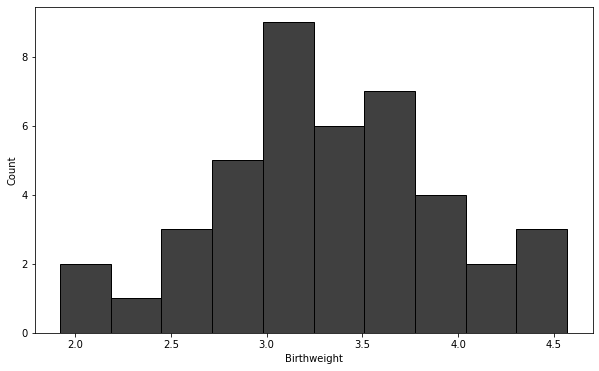

In [4]:
sns.histplot(df['Birthweight'], bins=10, alpha = 0.75,color='black');
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='Birthweight'>

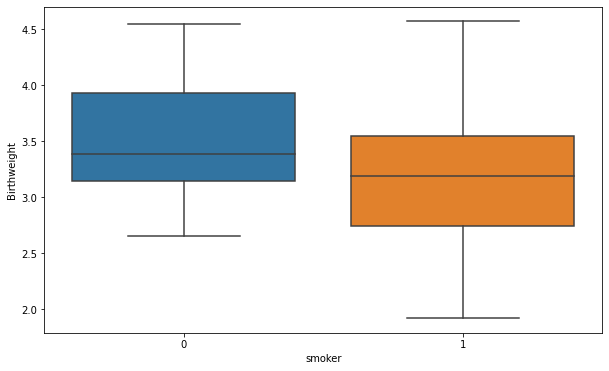

In [5]:
sns.boxplot(x=df['smoker'],y=df['Birthweight'])

<AxesSubplot:xlabel='smoker', ylabel='Length'>

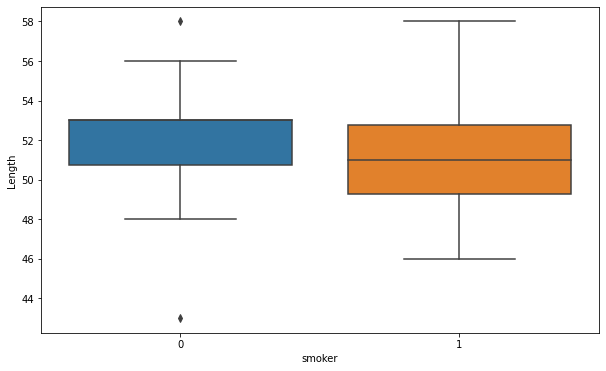

In [6]:
sns.boxplot(x=df['smoker'],y=df['Length'])

<AxesSubplot:xlabel='smoker', ylabel='Headcirc'>

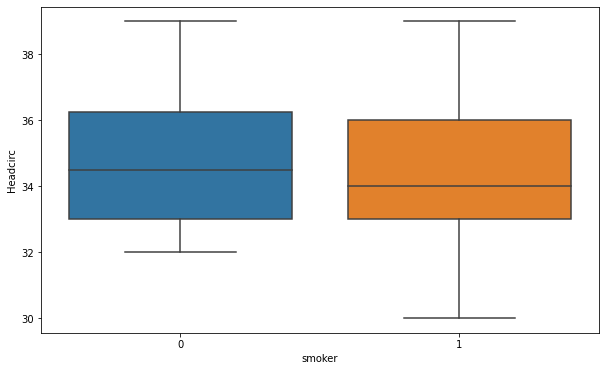

In [7]:

sns.boxplot(x=df['smoker'],y=df['Headcirc'])

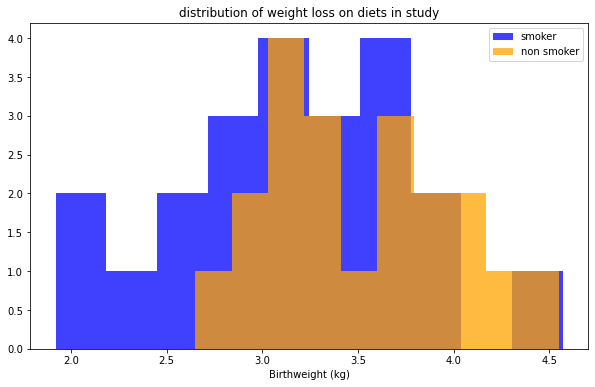

In [8]:
dfsmoke=df[df['smoker']==1]
dfnon=df[df['smoker']==0]
fig, ax = plt.subplots()
ax.hist(dfsmoke['Birthweight'], bins=10, alpha = 0.75, label='smoker',color='blue');
ax.hist(dfnon['Birthweight'], bins=10, alpha = 0.75, label='non smoker',color='orange');
plt.xlabel('Birthweight (kg)')
plt.ylabel('')
plt.title('distribution of weight loss on diets in study')
plt.legend()
plt.show()

In [9]:
print(dfsmoke['Birthweight'].describe())
print(dfnon['Birthweight'].describe())

count    22.000000
mean      3.134091
std       0.631247
min       1.920000
25%       2.742500
50%       3.185000
75%       3.545000
max       4.570000
Name: Birthweight, dtype: float64
count    20.000000
mean      3.509500
std       0.518495
min       2.650000
25%       3.140000
50%       3.385000
75%       3.932500
max       4.550000
Name: Birthweight, dtype: float64


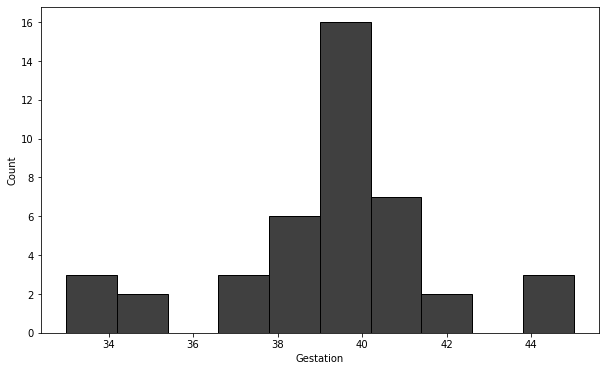

In [10]:
sns.histplot(df['Gestation'], bins=10, alpha = 0.75,color='black');
plt.show()

<AxesSubplot:xlabel='Gestation', ylabel='Birthweight'>

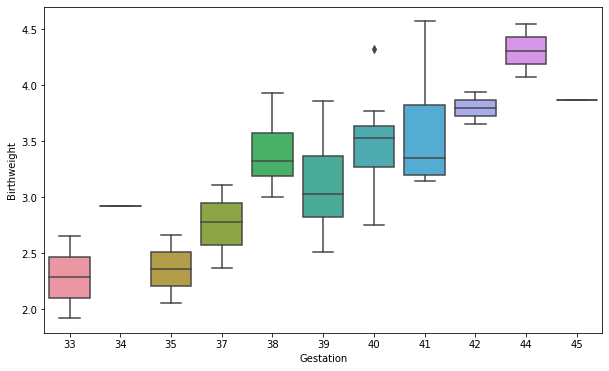

In [11]:
sns.boxplot(x=df['Gestation'],y=df['Birthweight'])



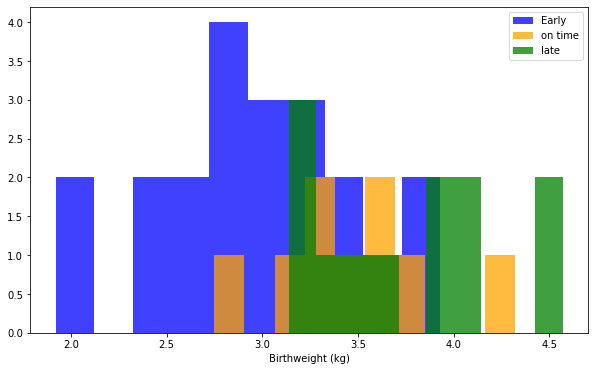

In [12]:
dfearly=df[df['Gestation']<40]
dfon=df[df['Gestation']==40]
dflate=df[df['Gestation']>40]
fig, ax = plt.subplots()
ax.hist(dfearly['Birthweight'], bins=10, alpha = 0.75, label='Early',color='blue');
ax.hist(dfon['Birthweight'], bins=10, alpha = 0.75, label='on time',color='orange');
ax.hist(dflate['Birthweight'], bins=10, alpha = 0.75, label='late',color='green');
plt.xlabel('Birthweight (kg)')
plt.ylabel('')
plt.title('')
plt.legend()
plt.show()

# Use of machine learning

In [13]:
df.head()
#importing the basic tools for my work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing the various sklearn packages required for the notebook
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import preprocessing
import sklearn.linear_model as linm

###### Use of machine learning

In [14]:
df['Birthweightgrams']=df['Birthweight']*1000

In [15]:
#df['Birthweightgrams'] = df.apply(lambda row: (int(np.asarray(row['Birthweight']))*1000),axis=1)

In [16]:
df['Birthweightgrams']=df['Birthweightgrams'].astype('int')

In [17]:
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,Birthweightgrams
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0,4550
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0,4320
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1,4100
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0,4070
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0,3940


In [33]:
inputs = df[['Gestation','mage','mheight','mppwt']]
output = df['Birthweightgrams']

In [34]:
knn =nei.KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.fit(inputs, output)

KNeighborsClassifier(n_neighbors=3)

In [36]:
df.loc[1]

ID                  1016.00
Length                53.00
Birthweight            4.32
Headcirc              36.00
Gestation             40.00
smoker                 0.00
mage                  19.00
mnocig                 0.00
mheight              171.00
mppwt                 62.00
fage                  19.00
fedyrs                12.00
fnocig                 0.00
fheight              183.00
lowbwt                 0.00
mage35                 0.00
Birthweightgrams    4320.00
Name: 1, dtype: float64

In [38]:
knn.predict([[40,19,171,62]])

array([3640])

In [43]:
knn.predict([[40,38,175,76]])

array([2750])

In [31]:
df.loc[2]

ID                   462.0
Length                58.0
Birthweight            4.1
Headcirc              39.0
Gestation             41.0
smoker                 0.0
mage                  35.0
mnocig                 0.0
mheight              172.0
mppwt                 58.0
fage                  31.0
fedyrs                16.0
fnocig                25.0
fheight              185.0
lowbwt                 0.0
mage35                 1.0
Birthweightgrams    4100.0
Name: 2, dtype: float64

In [41]:
knn.predict([[41,35,172,58]])

array([2750])

In [44]:
# setting up the data for the pairplots 
bubbas= df[['Gestation','mage','mheight','mppwt','Birthweightgrams']]

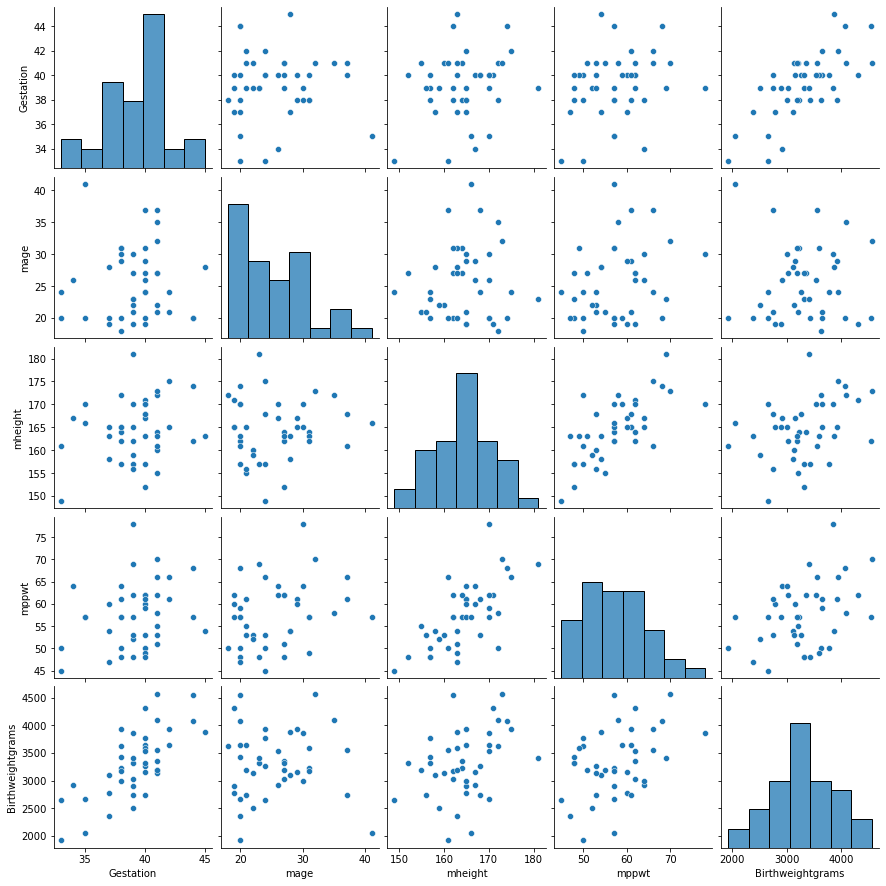

In [45]:
g = sns.pairplot(data=bubbas,
               palette=['red','blue','green'])

In [47]:
dfsmoke=df[df['smoker']==1]
dfnon=df[df['smoker']==0]

In [51]:
wobubba = df[['Gestation','mage','mheight','mppwt','Birthweightgrams','smoker']]
wobubba

,Gestation,mage,mheight,mppwt,Birthweightgrams,smoker
0,44,20,162,57,4550,0
1,40,19,171,62,4320,0
2,41,35,172,58,4100,0
3,44,20,174,68,4070,0
4,42,24,175,66,3940,0
5,38,29,165,61,3930,0
6,40,24,157,50,3770,0
7,42,21,165,61,3650,0
8,38,18,172,50,3630,0
9,38,20,157,48,3420,0


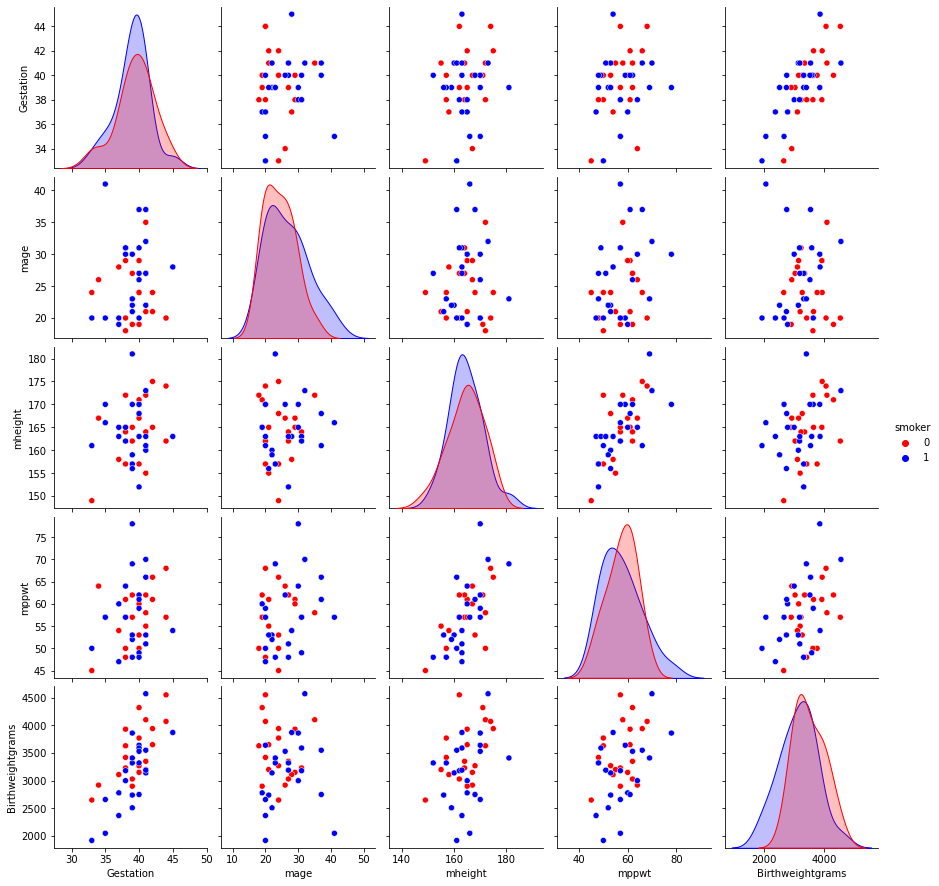

In [55]:
g = sns.pairplot(hue="smoker",data=wobubba,
               palette=['red','blue'])

In [73]:
train,test = mod.train_test_split(wobubba)

In [83]:
inputs , output = train[['mheight','mppwt']], train['Birthweightgrams']

In [84]:
inputs.head()

,mheight,mppwt
26,161,50
14,167,60
12,164,57
13,155,55
34,170,78


In [85]:
output.head()

26    1920
14    3150
12    3230
13    3200
34    3860
Name: Birthweightgrams, dtype: int32

In [86]:
lre2=lm.LogisticRegression(random_state=0, max_iter=5000)

In [87]:
lre2.fit(inputs,output)

LogisticRegression(max_iter=5000, random_state=0)

In [88]:
predictions =lre2.predict(test[['mheight','mppwt']])
(predictions == test['Birthweightgrams']).value_counts(normalize =True)

False    1.0
Name: Birthweightgrams, dtype: float64